In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
chi = gpd.read_file("../../data/chicago_purchases.geojson")
cook = gpd.read_file("../../data/cook_county_with_geometries4.geojson")
sections = gpd.read_file("../../data/sections.json")

In [3]:
chi.drop(inplace=True, columns=['Date'])

In [4]:
cook.dtypes

id                         int64
Cleaned Name              object
Purchaser                 object
Residence                 object
Social Status             object
Aliquot Parts or Lot      object
Section Number           float64
Township                  object
Range                     object
Meridian                 float64
County of Purchase        object
Acres                    float64
Price per Acre            object
Total Price               object
Type of Sale              object
Date of Purchase          object
Volume                    object
Page                       int64
Shapefile Object ID      float64
Voided                      bool
Lot Matches               object
Name Matches              object
Duplicate                   bool
IBL                       object
part                      object
block                    float64
lot                      float64
YEAR                     float64
geometry                geometry
dtype: object

In [5]:
chi_pre1830 = chi.loc[(chi.YEAR <= 1830)&(chi.Voided == False)&(chi.Duplicate == False)]
cook_pre1830 = cook.loc[(chi.YEAR <= 1830)&(cook.Voided == False)&(cook.Duplicate == False)]

In [6]:
len(cook_pre1830)

140

<AxesSubplot:>

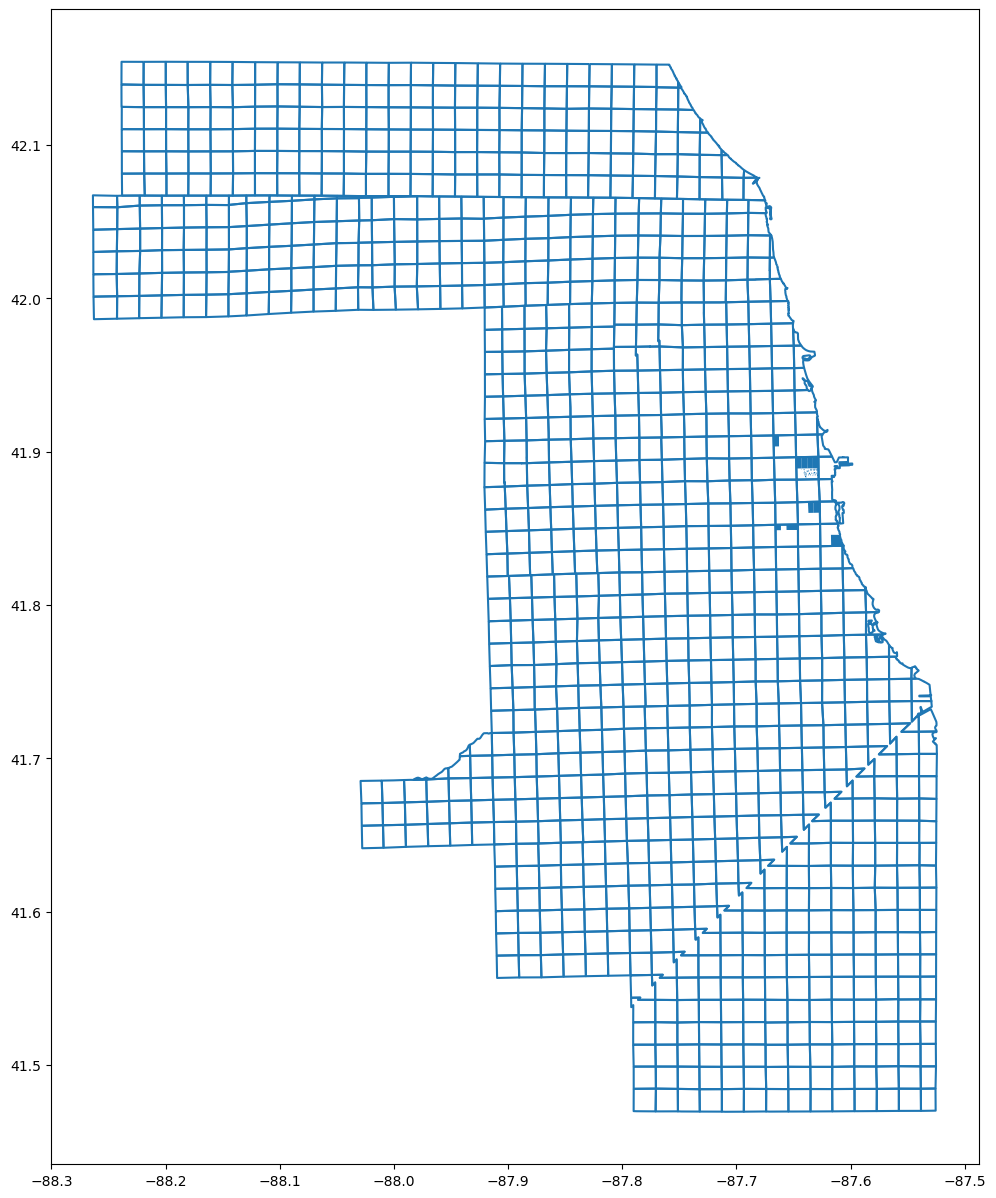

In [7]:
fig, ax = plt.subplots(figsize=(30,15))

sections.boundary.plot(ax=ax)
chi_pre1830.plot(ax=ax)

In [8]:
chicago_border = gpd.read_file("../../data/chicago_border.geojson")

In [9]:
sections_city = sections.overlay(chicago_border, how="intersection")

In [10]:
chi_pre1830.area.sum() / sections_city.area.sum()

/var/folders/w2/999xw7715kj3_sqxrf0t3nb00000gn/T/ipykernel_67392/644291491.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  chi_pre1830.area.sum() / sections_city.area.sum()


0.006083199819384933

In [11]:
chi_pre1830.area.sum() / sections.area.sum()

/var/folders/w2/999xw7715kj3_sqxrf0t3nb00000gn/T/ipykernel_67392/3654075219.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  chi_pre1830.area.sum() / sections.area.sum()


0.001449751866150642

In [12]:
len(sections)

988

In [13]:
len(sections_city)

286

In [14]:
chi_pre1830.Acres.sum()

746.8100000000001

In [15]:
cook[cook['Acres'] == 0]

,id,Cleaned Name,Purchaser,Residence,Social Status,Aliquot Parts or Lot,Section Number,Township,Range,Meridian,...,Voided,Lot Matches,Name Matches,Duplicate,IBL,part,block,lot,YEAR,geometry
7,7,ACKOFF NICHOLAS,ACKOFF NICHOLAS,UNKNOWN,None,SL2L5BL24CHI,NaN,None,None,NaN,...,False,None,7;8;3293,False,,SLL5BLCHI,24.0,2.0,1848.0,None
8,8,ACKOFF NICHOLAS,ACKOFF NICHOLAS,UNKNOWN,None,SL1L5BL24CHI,NaN,None,None,NaN,...,False,None,7;8;3293,False,,SL1L5BLCHI,24.0,1.0,1848.0,None
9,9,ADAMS WILLIAM,ADAM WILLIAM,UNKNOWN,None,LOT6BL35,21.0,39N,14E,3.0,...,False,None,9;28;29,False,,BL35,35.0,6.0,1848.0,"POLYGON ((-87.64081 41.85419, -87.64062 41.854..."
33,33,ADAMS WILLIAM H,ADAMS WILLIAM H,UNKNOWN,None,L6B33EFRSEFR,21.0,39N,14E,3.0,...,False,None,28;29;30;31;32;33,False,,L6B33ESE,33.0,6.0,1853.0,"POLYGON ((-87.62860 41.85495, -87.62860 41.855..."
34,34,ADSIT JAMES M,ADSIT J M,UNKNOWN,I,BL25,17.0,39N,14E,3.0,...,False,None,34,False,,BL5,25.0,NaN,1851.0,"POLYGON ((-87.65241 41.87669, -87.65242 41.877..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12240,13228,WRIGHT T G,WRIGHT T G,UNKNOWN,I,L1BL52CHIOTV,NaN,None,None,NaN,...,True,None,13220;13221;13222;13223;13224;13225;13226;1322...,False,,L1BL5CHIOT,52.0,1.0,1836.0,None
12249,13237,YEAGER JULIUS,YEAGER JULIUS,UNKNOWN,None,LOT15BL65CHI,NaN,None,None,NaN,...,False,None,13237;13238,False,,BL65CHI,65.0,15.0,1848.0,None
12250,13238,YEAGER JULIUS,YEAGER JULIUS,UNKNOWN,None,LOT16BL65CHI,NaN,None,None,NaN,...,False,None,13237;13238,False,,BL65CHI,65.0,16.0,1848.0,None
12263,13251,YOUNG HUGH,YOUNG HUGH,UNKNOWN,None,W2W2L6B54CHI,NaN,None,None,NaN,...,False,None,13251,False,,WWL6B5CHI,54.0,6.0,1843.0,None


In [16]:
cook = cook.to_crs("EPSG:26916")
chi = chi.to_crs("EPSG:26916")

In [17]:
cook.loc[9, 'geometry'].area / 4047

0.5438011168507386

In [18]:
cook.loc[3, 'geometry'].area / 4047

162.4456500666462

In [19]:
cook['estimated_acres'] = 0
chi['estimated_acres'] = 0

In [20]:
for df in [cook, chi]:
    for idx, row in df.iterrows():
        if row['Acres'] > 0:
            df.loc[idx, 'estimated_acres'] = row['Acres']
        elif pd.notnull(row['geometry']):
            df.loc[idx, 'estimated_acres'] = row['geometry'].area / 4047

In [26]:
cook.to_crs("wgs84").to_file("../../data/cook_county_with_geometries5.geojson")
chi.to_crs("wgs84").to_file("../../data/chicago_purchases2.geojson")

In [25]:
cook.head()

,id,Cleaned Name,Purchaser,Residence,Social Status,Aliquot Parts or Lot,Section Number,Township,Range,Meridian,...,Lot Matches,Name Matches,Duplicate,IBL,part,block,lot,YEAR,geometry,estimated_acres
0,0,ABBE CHRISTIAN,ABBE CHRISTIAN,UNKNOWN,A,LOT2NWNE,16.0,36N,13E,3.0,...,None,0,False,,NWNE,NaN,2.0,1852.0,"POLYGON ((437781.758 4607604.180, 438189.842 4...",40.02
1,1,ABBOTT ALLISON,ABBOTT ALLISON,UNKNOWN,A,LOT1SW,6.0,40N,13E,3.0,...,None,1,False,,SW,NaN,1.0,1841.0,"POLYGON ((433927.281 4648177.987, 433924.630 4...",79.72
2,2,ABBOTT JOSEPH,ABBOTT JOSEPH,UNKNOWN,None,NWSW,3.0,37N,12E,3.0,...,2,2,False,,NWSW,NaN,NaN,1853.0,"POLYGON ((428739.395 4619604.222, 429119.463 4...",40.00
3,3,ABBOTT SAMUEL S,ABBOTT SAMUEL,UNKNOWN,None,SW,14.0,40N,13E,3.0,...,None,3;4,False,,SW,NaN,NaN,1838.0,"POLYGON ((439693.640 4645089.911, 439692.929 4...",160.00
4,4,ABBOTT SAMUEL S,ABBOTT SAMUEL S,UNKNOWN,None,SE,15.0,40N,13E,3.0,...,None,3;4,False,,SE,NaN,NaN,1838.0,"POLYGON ((438880.943 4644921.780, 438880.704 4...",160.00
